<a href="https://colab.research.google.com/github/bakerjeninah123/cmpe460_project/blob/main/cmpe_460_box_detection_118200016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Download YOLOv7 repository and install requirements
!git clone https://github.com/WongKinYiu/yolov7
%cd yolov7
!pip install -r requirements.txt

Cloning into 'yolov7'...
remote: Enumerating objects: 1127, done.
remote: Total 1127 (delta 0), reused 0 (delta 0), pack-reused 1127
Receiving objects: 100% (1127/1127), 69.92 MiB | 17.54 MiB/s, done.
Resolving deltas: 100% (527/527), done.
/content/yolov7
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 70.8 MB/s eta 0:00:00


In [2]:
# install dependencies as necessary
!pip install -qr requirements.txt  # install dependencies (ignore errors)
import torch

from IPython.display import Image, clear_output  # to display images

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.13.1+cu116 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


In [3]:
%cd /content

!curl -L "https://app.roboflow.com/ds/ZCwOYJLruw?key=SjV4l9bmj5" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

Streaming output truncated to the last 5000 lines.
 extracting: train/images/net-15913-_jpg.rf.75082298d5b5a9b0b1712a00812d9219.jpg  
 extracting: train/images/net-15913-_jpg.rf.770724e6d700b187c98c2ca8c2aac529.jpg  
 extracting: train/images/net-15914-_jpg.rf.2554fb485f7b0114093cb2f03f9c5408.jpg  
 extracting: train/images/net-15914-_jpg.rf.4a003effc1222e794c08f6131c6378f9.jpg  
 extracting: train/images/net-15915-_jpg.rf.913125fa6b7750c9839dce5028861e3c.jpg  
 extracting: train/images/net-15920-_jpg.rf.9695c2333ded5c55131fc09a43346912.jpg  
 extracting: train/images/net-15922-_jpg.rf.a787fdbee26d89ce37cee4672cf34c10.jpg  
 extracting: train/images/net-15924-_jpg.rf.24ecd3db19a4bdd84814e0d0d30f7277.jpg  
 extracting: train/images/net-15924-_jpg.rf.e801fabae642505e22048497ff86d831.jpg  
 extracting: train/images/net-15925-_jpg.rf.8681e1ac080ee599e701c5f7bd0d9f5d.jpg  
 extracting: train/images/net-15925-_jpg.rf.fb9ff05ddda970acabd25fb6e72b9c3e.jpg  
 extracting: train/images/net-15927-

In [4]:
%cat data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 1
names: ['Carton']

roboflow:
  workspace: project-9tdw1
  project: box-6500images
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/project-9tdw1/box-6500images/dataset/1

In [ ]:
# train yolov7s on custom data for 500 epochs
# time its performance
%%time
%cd /content/yolov7/
!python train.py --img 640 --batch-size 16 --epochs 50 --data /content/data.yaml --cfg cfg/training/yolov7.yaml --weights yolov7.pt --hyp data/hyp.scratch.custom.yaml --cache 

In [12]:
!python test.py --data /content/data.yaml --img 640 --batch-size 16 --conf 0.001 --iou 0.65 --device 0 --weights /content/yolov7/runs/train/exp2/weights/best.pt

Namespace(augment=False, batch_size=16, conf_thres=0.001, data='/content/data.yaml', device='0', exist_ok=False, img_size=640, iou_thres=0.65, name='exp', no_trace=False, project='runs/test', save_conf=False, save_hybrid=False, save_json=False, save_txt=False, single_cls=False, task='val', v5_metric=False, verbose=False, weights=['/content/yolov7/runs/train/exp2/weights/best.pt'])
YOLOR 🚀 v0.1-121-g2fdc7f1 torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36481772 parameters, 6194944 gradients, 103.2 GFLOPS
 Convert model to Traced-model... 
 trac

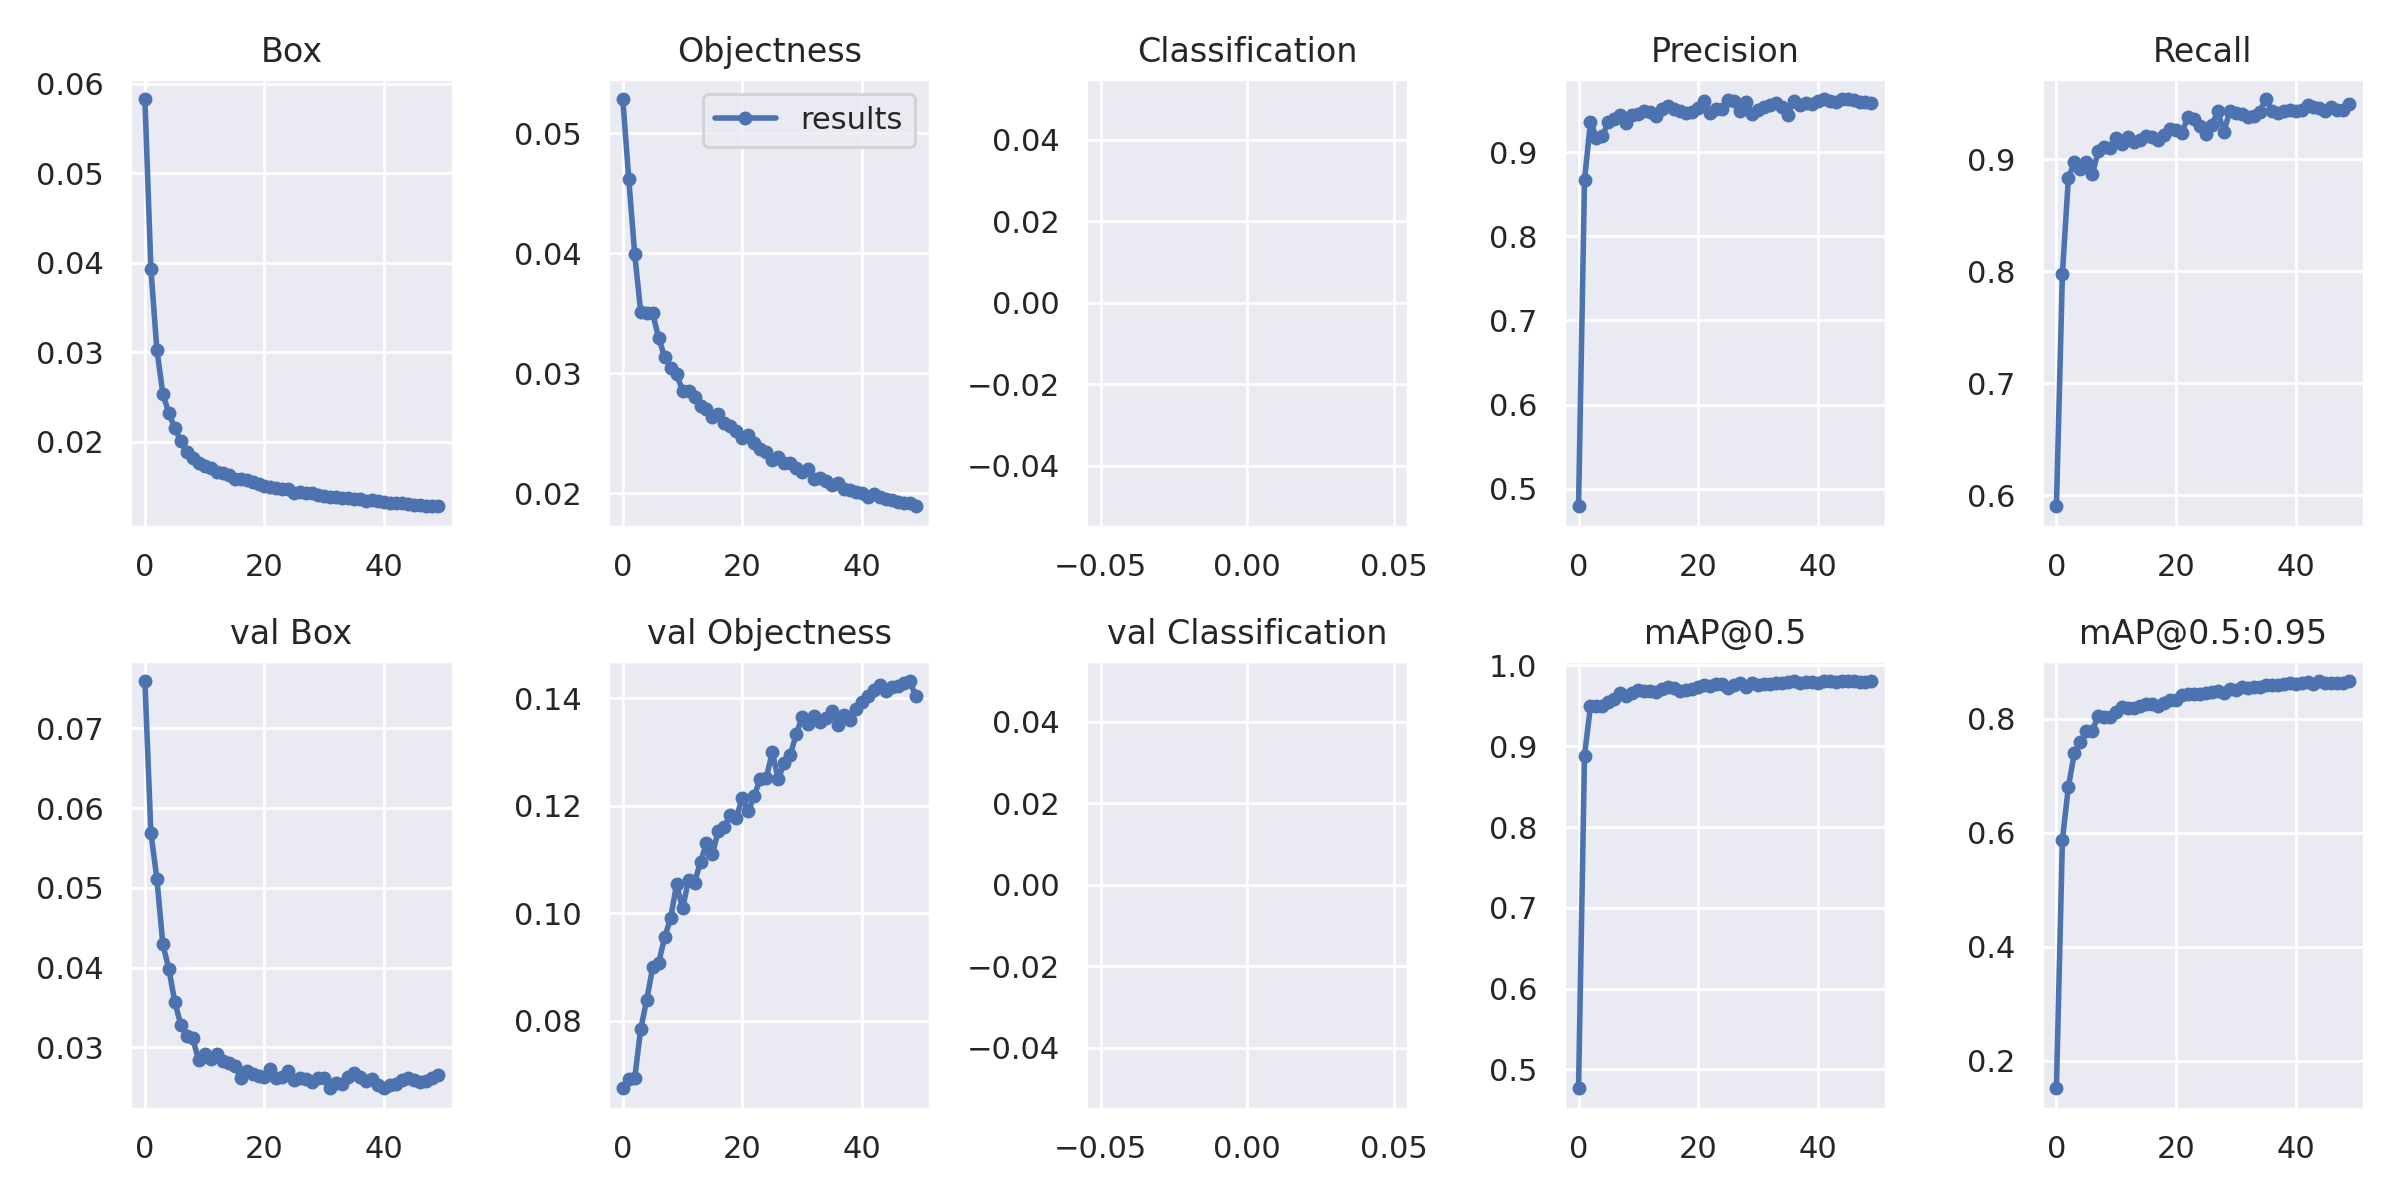

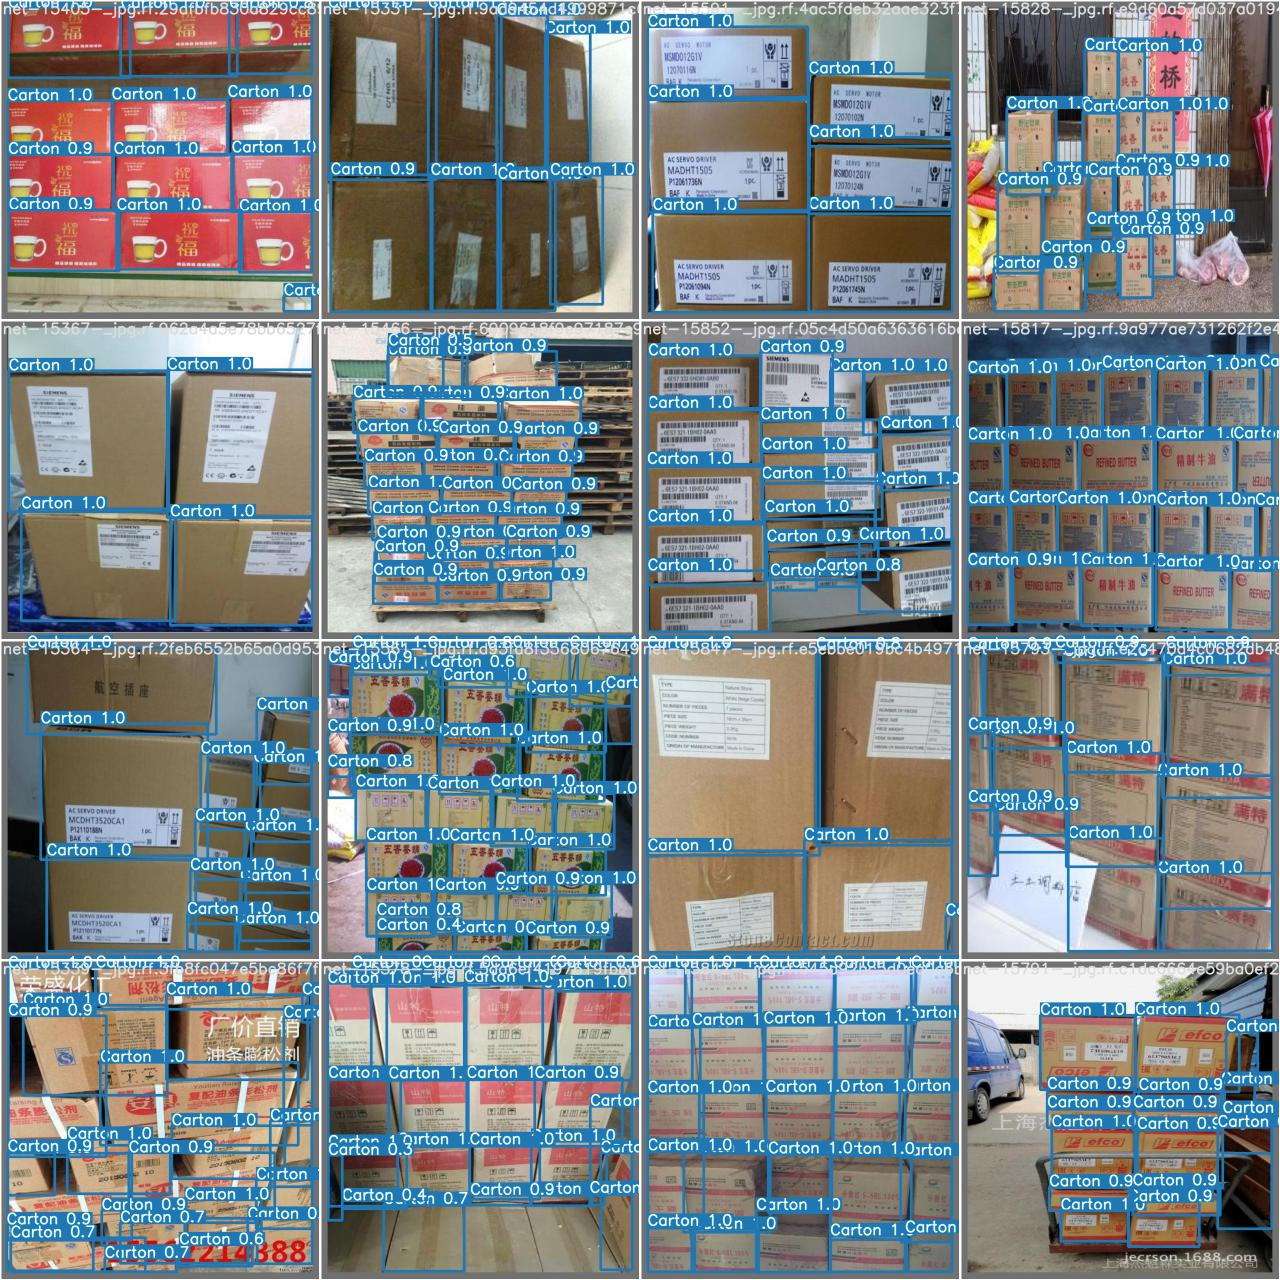

In [54]:
from IPython.display import Image, display
display(Image('/content/yolov7/runs/train/exp2/results.png'))
display(Image('/content/yolov7/runs/train/exp2/test_batch2_pred.jpg'))

In [20]:
!python detect.py --weights /content/yolov7/runs/train/exp2/weights/best.pt --conf 0.25 --img-size 640 --source /content/video1.mp4

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='/content/video1.mp4', update=False, view_img=False, weights=['/content/yolov7/runs/train/exp2/weights/best.pt'])
YOLOR 🚀 v0.1-121-g2fdc7f1 torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36481772 parameters, 6194944 gradients, 103.2 GFLOPS
 Convert model to Traced-model... 
 traced_script_module saved! 
 model 

In [23]:
!python detect.py --weights /content/yolov7/runs/train/exp2/weights/best.pt --conf 0.25 --img-size 640 --source /content/video2.mp4

Streaming output truncated to the last 5000 lines.
video 1/1 (542/5540) /content/video2.mp4: 1 Carton, Done. (13.5ms) Inference, (1.0ms) NMS
video 1/1 (543/5540) /content/video2.mp4: 1 Carton, Done. (13.1ms) Inference, (1.0ms) NMS
video 1/1 (544/5540) /content/video2.mp4: 1 Carton, Done. (14.1ms) Inference, (1.0ms) NMS
video 1/1 (545/5540) /content/video2.mp4: 1 Carton, Done. (13.0ms) Inference, (1.0ms) NMS
video 1/1 (546/5540) /content/video2.mp4: 1 Carton, Done. (12.6ms) Inference, (1.0ms) NMS
video 1/1 (547/5540) /content/video2.mp4: 1 Carton, Done. (13.1ms) Inference, (1.0ms) NMS
video 1/1 (548/5540) /content/video2.mp4: 1 Carton, Done. (12.3ms) Inference, (1.0ms) NMS
video 1/1 (549/5540) /content/video2.mp4: 1 Carton, Done. (12.2ms) Inference, (1.0ms) NMS
video 1/1 (550/5540) /content/video2.mp4: 1 Carton, Done. (13.2ms) Inference, (0.9ms) NMS
video 1/1 (551/5540) /content/video2.mp4: 2 Cartons, Done. (12.2ms) Inference, (1.0ms) NMS
video 1/1 (552/5540) /content/video2.mp4: 1 Cart

In [40]:
!python detect.py --weig hts /content/yolov7/runs/train/exp2/weights/best.pt --conf 0.25 --img-size 640 --source /content/image1.jpg

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='/content/image1.jpg', update=False, view_img=False, weights=['/content/yolov7/runs/train/exp2/weights/best.pt'])
YOLOR 🚀 v0.1-121-g2fdc7f1 torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36481772 parameters, 6194944 gradients, 103.2 GFLOPS
 Convert model to Traced-model... 
 traced_script_module saved! 
 model 

In [42]:
!python detect.py --weights /content/yolov7/runs/train/exp2/weights/best.pt --conf 0.25 --img-size 640 --source /content/image2.jpg

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='/content/image2.jpg', update=False, view_img=False, weights=['/content/yolov7/runs/train/exp2/weights/best.pt'])
YOLOR 🚀 v0.1-121-g2fdc7f1 torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36481772 parameters, 6194944 gradients, 103.2 GFLOPS
 Convert model to Traced-model... 
 traced_script_module saved! 
 model 

In [43]:
!python detect.py --weights /content/yolov7/runs/train/exp2/weights/best.pt --conf 0.25 --img-size 640 --source /content/image3.jpg

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='/content/image3.jpg', update=False, view_img=False, weights=['/content/yolov7/runs/train/exp2/weights/best.pt'])
YOLOR 🚀 v0.1-121-g2fdc7f1 torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36481772 parameters, 6194944 gradients, 103.2 GFLOPS
 Convert model to Traced-model... 
 traced_script_module saved! 
 model 

In [41]:
!python detect.py --weights /content/yolov7/runs/train/exp2/weights/best.pt --conf 0.25 --img-size 640 --source /content/image4.webp

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='/content/image4.webp', update=False, view_img=False, weights=['/content/yolov7/runs/train/exp2/weights/best.pt'])
YOLOR 🚀 v0.1-121-g2fdc7f1 torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36481772 parameters, 6194944 gradients, 103.2 GFLOPS
 Convert model to Traced-model... 
 traced_script_module saved! 
 model

In [49]:
!python detect.py --weights /content/yolov7/runs/train/exp2/weights/best.pt --conf 0.25 --img-size 640 --source /content/box.jpg

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='/content/box.jpg', update=False, view_img=False, weights=['/content/yolov7/runs/train/exp2/weights/best.pt'])
YOLOR 🚀 v0.1-121-g2fdc7f1 torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36481772 parameters, 6194944 gradients, 103.2 GFLOPS
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is 

In [51]:
!python detect.py --weights /content/yolov7/runs/train/exp2/weights/best.pt --conf 0.25 --img-size 640 --source /content/download.jpg

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='/content/download.jpg', update=False, view_img=False, weights=['/content/yolov7/runs/train/exp2/weights/best.pt'])
YOLOR 🚀 v0.1-121-g2fdc7f1 torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36481772 parameters, 6194944 gradients, 103.2 GFLOPS
 Convert model to Traced-model... 
 traced_script_module saved! 
 mode

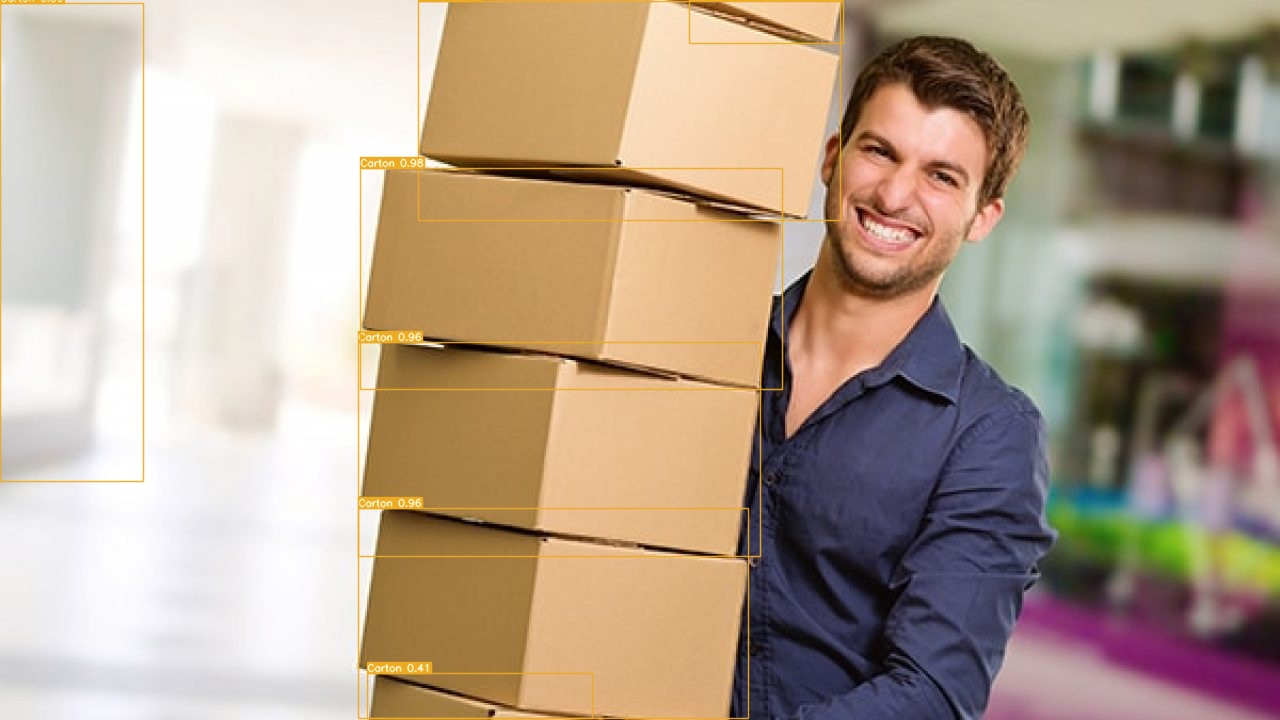

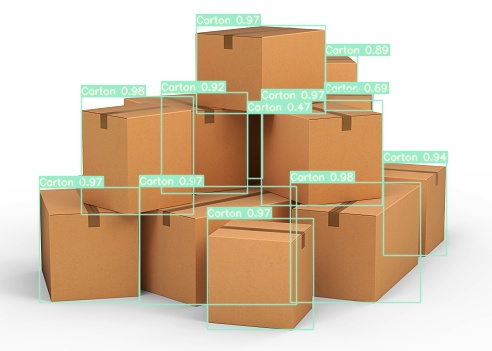

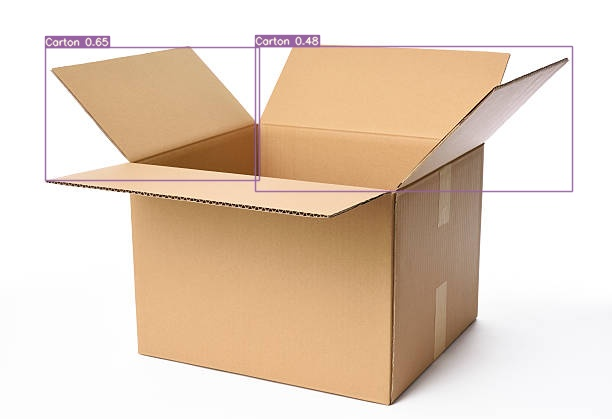

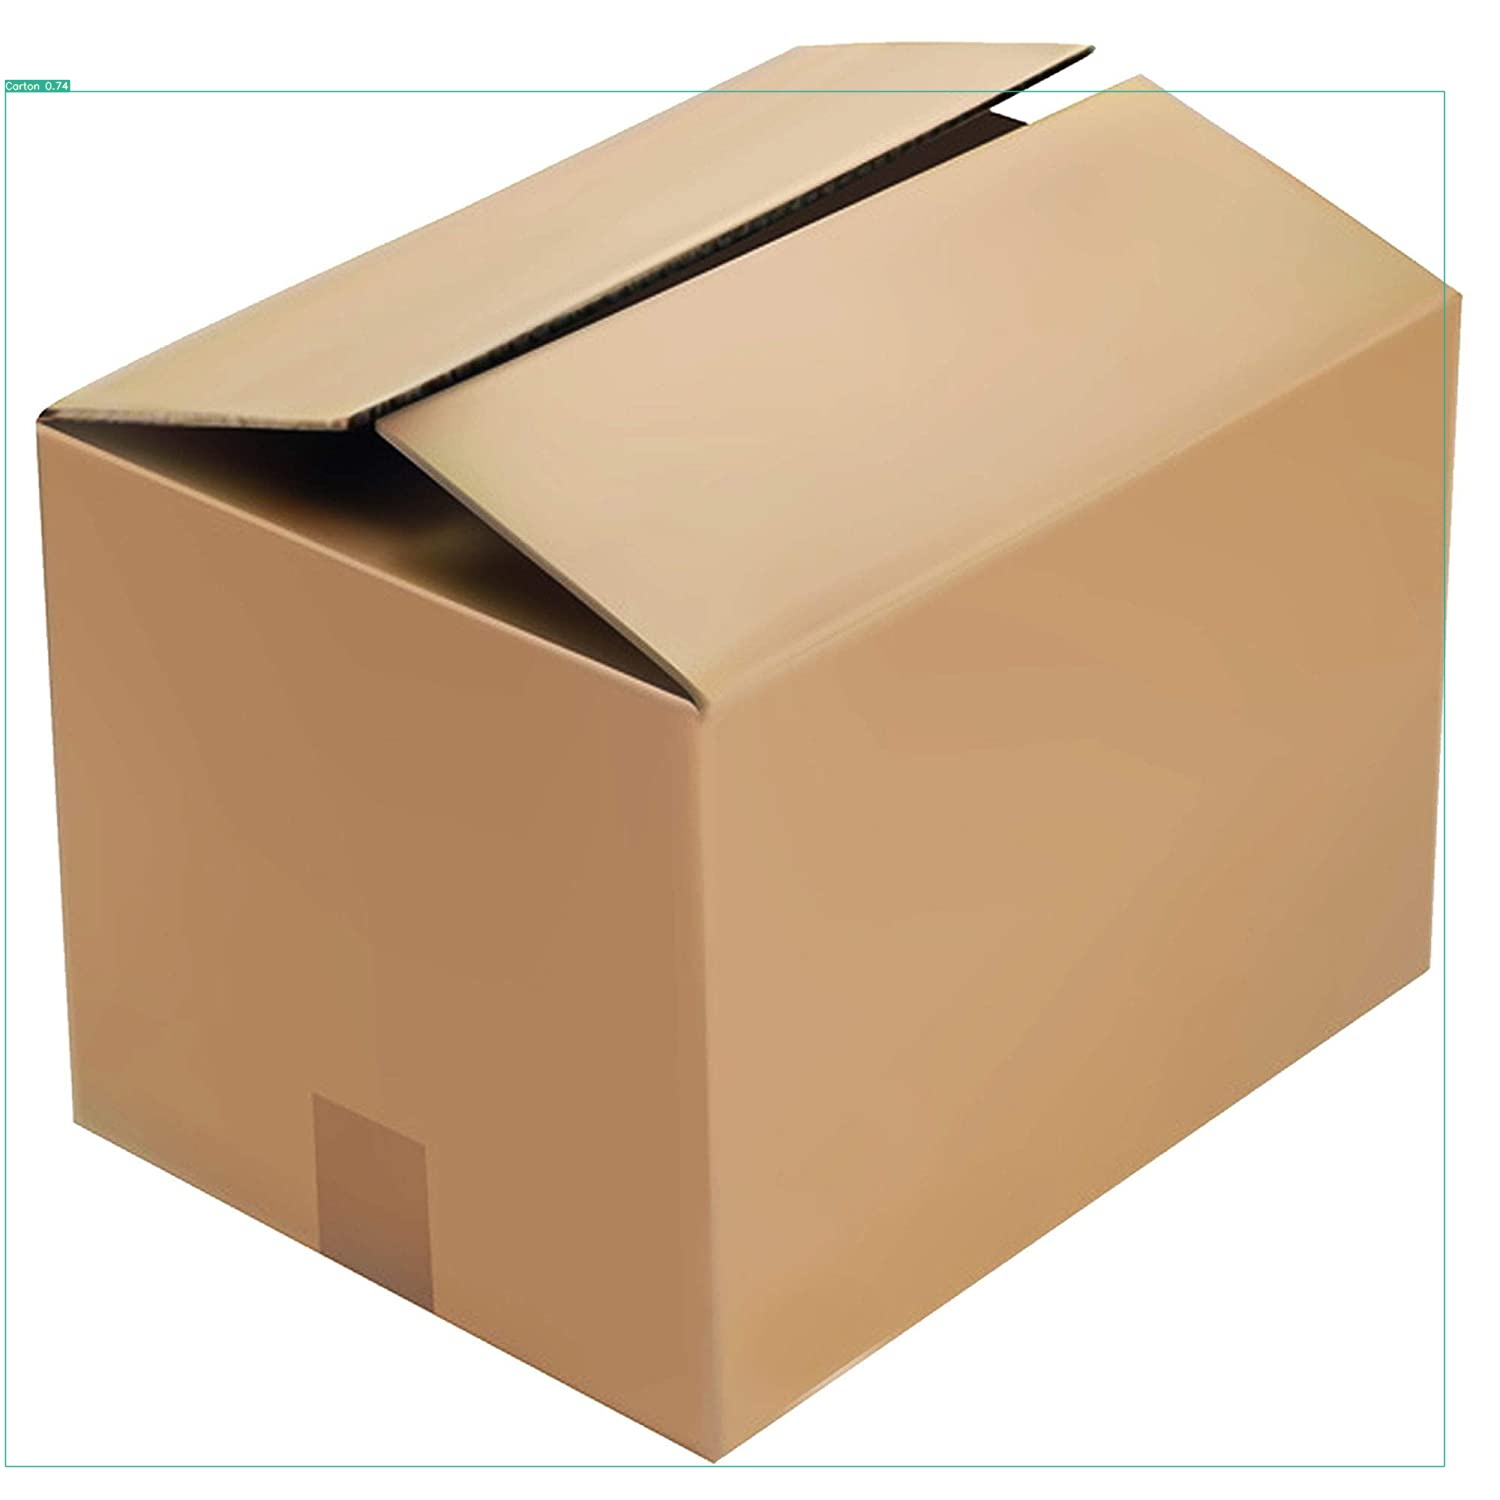

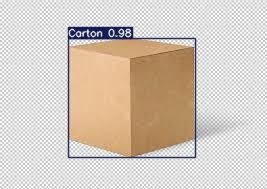

In [52]:
from IPython.display import Image, display
display(Image('/content/yolov7/runs/detect/exp3/image1.jpg'))
display(Image('/content/yolov7/runs/detect/exp5/image2.jpg'))
display(Image('/content/yolov7/runs/detect/exp6/image3.jpg'))
display(Image('/content/yolov7/runs/detect/exp7/box.jpg'))
display(Image('/content/yolov7/runs/detect/exp8/download.jpg'))

In [73]:
#https://youtu.be/-Q5Bn0KSe4A
#https://youtu.be/9gmXKGZR9jY